In [159]:
# Dependencies
import pandas as pd
import numpy as np
import csv
from datetime import datetime as dt
import unicodecsv
import matplotlib.pyplot as plt

### Loading CSV files

In [2]:
# Define a function to read csv files
def read_csv(file_name):
    with open(file_name, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [3]:
enrollments = read_csv("enrollments.csv")
daily_engagement = read_csv("daily_engagement.csv")
project_submissions = read_csv("project_submissions.csv")

In [4]:
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [5]:
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

In [6]:
project_submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

### Fixing Data Types

In [7]:
# function for fixing the datetime type
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# function for fixing the object data type
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

In [8]:
# Clean up the enrollement data
for enrollment in enrollments:
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_udacity'] = enrollment['is_udacity']=="True"
    enrollment['is_canceled'] = enrollment['is_canceled']=="True" 

In [9]:
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [10]:
# Clean up the daily_engagement data
for engagement in daily_engagement:
    engagement['utc_date'] = parse_date(engagement['utc_date'])
    engagement['lessons_completed'] = int(float(engagement['lessons_completed']))
    engagement['num_courses_visited'] = int(float(engagement['num_courses_visited']))
    engagement['projects_completed'] = int(float(engagement['projects_completed']))
    engagement['total_minutes_visited'] = float(engagement['total_minutes_visited'])    

In [11]:
# Clean up the project_submissions data
for submissions in project_submissions:
    submissions['creation_date'] = parse_date(submissions['creation_date'])
    submissions['completion_date'] = parse_date(submissions['completion_date'])   

In [12]:
# Let's check how many rows we have in the tables
def num_rows(data):
    return len(data)

In [13]:
enrollment_num_row = num_rows(enrollments)
engagement_num_row = num_rows(daily_engagement)
submission_num_row = num_rows(project_submissions)

In [14]:
print('Total number of rows for enrollments table is {}'.format(enrollment_num_row))
print('Total number of rows for daily engagement table is {}'.format(engagement_num_row))
print('Total number of rows for project submissions table is {}'.format(submission_num_row))

Total number of rows for enrollments table is 1640
Total number of rows for daily engagement table is 136240
Total number of rows for project submissions table is 3642


In [15]:
# Let's change the column name of 'acct' to 'account_key' in engagement table
for column in daily_engagement:
    column['account_key'] = column['acct']
    del[column['acct']]

In [16]:
daily_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

In [17]:
# Let's check the number of unique students of each table (account keys)
def find_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [18]:
enrollment_unique_student = find_unique_students(enrollments)
engagement_unique_student = find_unique_students(daily_engagement)
submission_unique_student = find_unique_students(project_submissions)

In [19]:
print('The number of unique students in enrollment table is {}'.format(len(enrollment_unique_student)))
print('The number of unique students in daily engagement table is {}'.format(len(engagement_unique_student)))
print('The number of unique students in project submissions table is {}'.format(len(submission_unique_student)))

The number of unique students in enrollment table is 1302
The number of unique students in daily engagement table is 1237
The number of unique students in project submissions table is 743


We can see there're different number of unique students in tables and there should be a problem there.


In [20]:
# Let's find out the students who are not in engagement unique table.

enrollment_who_not_in_engagement_unique = []

for enrollment in enrollments:
    student = enrollment['account_key']
    if student in engagement_unique_student:
        continue
    else:
        enrollment_who_not_in_engagement_unique.append(enrollment) 
        
enrollment_who_not_in_engagement_unique

[OrderedDict([('account_key', '1219'),
              ('status', 'canceled'),
              ('join_date', datetime.datetime(2014, 11, 12, 0, 0)),
              ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)),
              ('days_to_cancel', 0),
              ('is_udacity', False),
              ('is_canceled', True)]),
 OrderedDict([('account_key', '871'),
              ('status', 'canceled'),
              ('join_date', datetime.datetime(2014, 11, 13, 0, 0)),
              ('cancel_date', datetime.datetime(2014, 11, 13, 0, 0)),
              ('days_to_cancel', 0),
              ('is_udacity', False),
              ('is_canceled', True)]),
 OrderedDict([('account_key', '1218'),
              ('status', 'canceled'),
              ('join_date', datetime.datetime(2014, 11, 15, 0, 0)),
              ('cancel_date', datetime.datetime(2014, 11, 15, 0, 0)),
              ('days_to_cancel', 0),
              ('is_udacity', False),
              ('is_canceled', True)]),
 OrderedDict([('a

As we can there are lot of poeple have same date of join and cancel date!!

In [21]:
# let's check the students who they have different join date and cancel date

num_student = 0

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in engagement_unique_student and \
    enrollment['join_date'] != enrollment['cancel_date']:
        num_student+=1
        print(enrollment)

print(num_student)

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])
3


In [22]:
# Check the account keys for all Udacity test accounts
udacity_accounts = set()
for udacity in enrollments:
    if udacity["is_udacity"] == True:
        udacity_accounts.add(udacity["account_key"])
print(udacity_accounts)

{'818', '1304', '448', '1101', '312', '1069'}


In [27]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_acoounts(data):
    non_udacity_accounts = []
    for data_point in data:
        if data_point['account_key'] not in udacity_accounts:
            non_udacity_accounts.append(data_point)
    return non_udacity_accounts

In [28]:
non_udacity_enrollements = remove_udacity_acoounts(enrollments)
non_udacity_engagments = remove_udacity_acoounts(daily_engagement)
non_udacity_submissions = remove_udacity_acoounts(project_submissions)

In [29]:
print('The number of non udaicty students in enrollment table is {}'.format(len(non_udacity_enrollements)))
print('The number of non udaicty students in daily engagment table is {}'.format(len(non_udacity_engagments)))
print('The number of non udaicty students in project submissions table is {}'.format(len(non_udacity_submissions)))

The number of non udaicty students in enrollment table is 1622
The number of non udaicty students in daily engagment table is 135656
The number of non udaicty students in project submissions table is 3634


In [80]:
enrollments_df = pd.DataFrame(paid_enrollments)
enrollments_df

,account_key,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled
0,429,canceled,2014-11-10,2015-03-10,120.0,False,True
1,429,canceled,2015-03-10,2015-06-17,99.0,False,True
2,60,canceled,2014-11-10,2015-01-14,65.0,False,True
3,60,canceled,2015-01-14,2015-04-01,77.0,False,True
4,60,current,2015-04-01,NaT,NaN,False,False
...,...,...,...,...,...,...,...
1288,751,current,2015-08-11,NaT,NaN,False,False
1289,1176,current,2015-08-12,NaT,NaN,False,False
1290,1110,current,2015-08-13,NaT,NaN,False,False
1291,874,current,2015-08-22,NaT,NaN,False,False


In [64]:
# Create a dictionary containing all the students who either haven't cancel yet or remained enrolled for more than 7 days.

paid_students = {}

for data_point in non_udacity_enrollements:
    if data_point["is_canceled"]== False or data_point["days_to_cancel"] > 7:
        account_key = data_point["account_key"]
        date = data_point["join_date"]
        
        paid_students[account_key] = date
        
print("The total students who haven't cancel the enrollment or still remained enrolled for more than seven days are: {}".format(len(paid_students)))  

The total students who haven't cancel the enrollment or still remained enrolled for more than seven days are: 995


### Getting data from first week

In [69]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
            
    return new_data

In [73]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollements)
paid_engagements = remove_free_trial_cancels(non_udacity_engagments)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

In [74]:
print(len(paid_enrollments))
print(len(paid_engagements))
print(len(project_submissions))

1293
134549
3642


In [81]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [98]:
## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagements_first_week = []

for engagement in paid_engagements:
    account_key = engagement["account_key"]
    date = paid_students[account_key]
    engagement_record_date = engagement["utc_date"]
    
    if within_one_week(date, engagement_record_date):
        paid_engagements_first_week.append(engagement)
        
len(paid_engagements_first_week)

6920

In [109]:
from collections import defaultdict

engagment_by_account = set()
for engagement in paid_engagements_first_week:
    account_key = engagement['account_key']
    engagment_by_account.add(engagement['account_key'])
len(engagment_by_account)
    

995

In [110]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

In [111]:
engagement_by_account = group_data(paid_engagements_first_week,'account_key')
len(engagement_by_account)

995

In [116]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')
len(total_minutes_by_account)

995

Mean: 305.4147189083705
Standard deviation: 405.91261032004155
Minimum: 0.0
Maximum: 3564.7332644989997


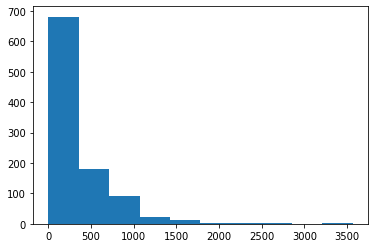

In [160]:
import numpy as np

def describe_data(data):
    print('Mean:', np.mean(list(data)))
    print('Standard deviation:', np.std(list(data)))
    print('Minimum:', np.min(list(data)))
    print('Maximum:', np.max(list(data)))
    plt.hist(data)
    
total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)

## Debugging Data Analysis Code

In [119]:
## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

students_with_max_mins = ''
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        students_with_max_mins = student
        
print(max_minutes)
print(students_with_max_mins) # account key of the student

3564.7332644989997
163


In [120]:
# Let's find each engagement for the student with max mins of engagements

for student in paid_engagements_first_week:
    if student['account_key'] == students_with_max_mins:
        print(student)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.519339666), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.633923334), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.018903666), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163')])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_courses_visited', 3), ('total_minutes_visited', 471.2139785), ('lessons_completed

## Passing students

In [129]:
## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission["lesson_key"]
    rating = submission['assigned_rating']
    
    if project == subway_project_lesson_keys[0] or project == subway_project_lesson_keys[1] and \
    (rating == 'PASSED' or rating == "DISTINCT"):
        pass_subway_project.add(submission['account_key'])
        
len(pass_subway_project)

637

## Non passing students evaluation with passing students

### Check the number of minutes by passing and non passing students

In [134]:
passing_students = []
non_passing_students = []

for students in paid_engagements_first_week:
    if students['account_key'] in pass_subway_project:
        passing_students.append(students)
    else:
        non_passing_students.append(students)
        
print(len(non_passing_students))
print(len(passing_students)) 

2462
4458


In [138]:
passing_engagement_accout = group_data(passing_students,'account_key')
non_passing_engagement_account = group_data(non_passing_students,'account_key')
print(len(passing_students))
print(len(non_passing_students))

4458
2462


In [140]:
passing_students_minutes = sum_grouped_items(passing_engagement_accout,"total_minutes_visited")
non_passing_minutes = sum_grouped_items(non_passing_engagement_account,"total_minutes_visited")

Mean: 389.94621916221513
Standard deviation: 440.39884135245893
Minimum: 0.0
Maximum: 3564.7332644989997


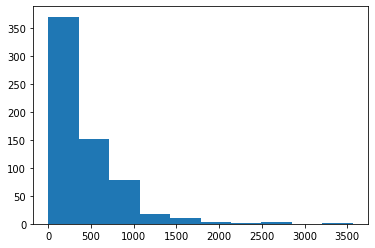

In [161]:
# Passing Students 
describe_passing_studens = passing_students_minutes.values()
describe_data(describe_passing_studens)

Mean: 155.00531761870832
Standard deviation: 278.3811214352894
Minimum: 0.0
Maximum: 1768.5227493319999


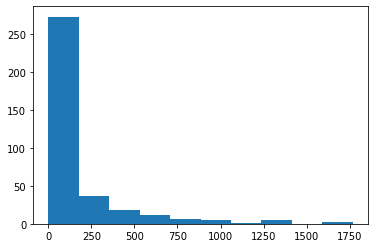

In [162]:
# Non passing students
describe_non_passing_students = non_passing_minutes.values()
describe_data(describe_non_passing_students)

There's a quite difference between mean and maximum values of passing and non passing students.

## Check the number of lessons completed by passing and non passing students

In [155]:
passing_students_lessons = sum_grouped_items(passing_engagement_accout,"lessons_completed")
non_passing_studens_lessons = sum_grouped_items(non_passing_engagement_account,"lessons_completed")

Mean: 2.043956043956044
Standard deviation: 3.1530228277863714
Minimum: 0
Maximum: 36


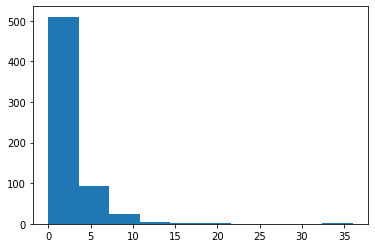

In [163]:
# Passing students
describe_passing_lesson_stu = passing_students_lessons.values()
describe_data(describe_passing_lesson_stu)

Mean: 0.8994413407821229
Standard deviation: 2.55136062301706
Minimum: 0
Maximum: 27


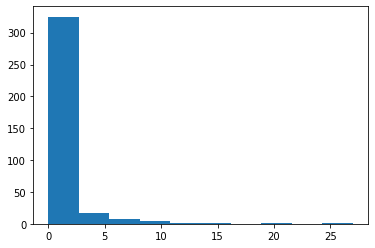

In [164]:
# Non passing students
describe_non_passing_lesson_stu = non_passing_studens_lessons.values()
describe_data(describe_non_passing_lesson_stu)

defaultdict(list,
            {'15': [OrderedDict([('utc_date',
                            datetime.datetime(2015, 3, 4, 0, 0)),
                           ('num_courses_visited', 4),
                           ('total_minutes_visited', 172.709897334),
                           ('lessons_completed', 1),
                           ('projects_completed', 0),
                           ('account_key', '15')]),
              OrderedDict([('utc_date', datetime.datetime(2015, 3, 5, 0, 0)),
                           ('num_courses_visited', 1),
                           ('total_minutes_visited', 108.647330667),
                           ('lessons_completed', 0),
                           ('projects_completed', 0),
                           ('account_key', '15')]),
              OrderedDict([('utc_date', datetime.datetime(2015, 3, 6, 0, 0)),
                           ('num_courses_visited', 1),
                           ('total_minutes_visited', 128.439285667),
                        